# Bayesian Model Fitting

This practical tutorial is adapted from Prof. Jbabdi's [MATLAB practical](https://users.fmrib.ox.ac.uk/~saad/ONBI/bayes_practical.html)

## Problem statement: 

We have data from some measurement (e.g. temperature). We assume there is some true unknown value corresponding to this measurement and that our measurement decide is noisy. 

To approximate the true unknown value, we make several measurements and use Bayesian inference to determinine the most likely value of the true unknown value. 

We write the problem statement as a linear generative model:

$$y = a + \epsilon$$

$$\epsilon = \mathcal{N}(0,s^2)$$

Where, $y$ is the data, $a$ is a paramter of the model (the true unknown temperature) and $\epsilon$ is additive noise assumed to be given by Gaussian distribution with mean $0$ and standard deviation $s$. 

The likelihood function of the generative model is given by: 

$$\mathcal{L}(y \mid a)= \mathcal{N}(a,s^2) $$
 

## Plot example Data and Likelihood

In [3]:
import numpy as np 

true_mean = 5
true_noise = 4
n = 4

y = true_mean + true_noise * np.random.normal(0,1, n)

ran = np.linspace(-15, 15, 1000)
N = len(ran)

In [4]:
#define function to calculate likelihood from gaussian
def calc_likelihood(y, ran, n, sd):
    N = len(ran)
    x = np.transpose(np.tile(y,(N,1)))
    mu = np.tile(ran,(n,1))
    numerator = np.sum(np.power(x - mu,2),0)
    denominator = np.power(sd,2)
    likelihood = np.exp(-0.5 * numerator / denominator)
    return likelihood
    

In [5]:
likelihood = calc_likelihood(y=y, ran=ran, n=n, sd=true_noise)

normalised_likelihood = likelihood / np.sum(likelihood)



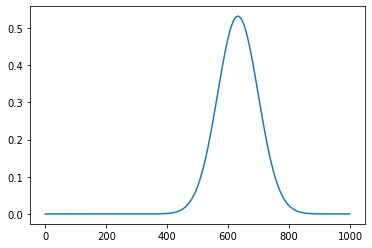

In [6]:
import matplotlib.pyplot as plt

plt.plot(likelihood)